# Task 3: Network Analysis with NetworkX 


NetworkX provides data structures and methods for creating,manipulating and storing graphs of different structures. It also implement a set of popular algorithms to analyze networks, and a simple interface to draw and visualize networks. 

The basic graph classes in NetworkX are  as follows:

<table class="table">
<thead>
<tr class="row-odd"><th class="head"><p>Networkx Class</p></th>
<th class="head"><p>Type</p></th>
<th class="head"><p>Self-loops allowed</p></th>
<th class="head"><p>Parallel edges allowed</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>Graph</p></td>
<td><p>undirected</p></td>
<td><p>Yes</p></td>
<td><p>No</p></td>
</tr>
<tr class="row-odd"><td><p>DiGraph</p></td>
<td><p>directed</p></td>
<td><p>Yes</p></td>
<td><p>No</p></td>
</tr>
<tr class="row-even"><td><p>MultiGraph</p></td>
<td><p>undirected</p></td>
<td><p>Yes</p></td>
<td><p>Yes</p></td>
</tr>
<tr class="row-odd"><td><p>MultiDiGraph</p></td>
<td><p>directed</p></td>
<td><p>Yes</p></td>
<td><p>Yes</p></td>
</tr>
</tbody>
</table>

All graph classes allow any hashable object as a node. Hashable objects include strings, tuples, integers, and more. Arbitrary edge attributes such as weights and labels can be associated with an edge[[1]](https://networkx.org/documentation/stable/reference/classes/index.html).

In previous task, We learned about feature engineering at node, edge and graph level. In Task 3, we use NetworkX to extract those features for the well-known Zachary's karate club network. 

## Setup

In [1]:
# Install packages quietly
!pip install -q networkx==3.0

In [2]:
# Import packages
import networkx as nx
import matplotlib.pyplot as plt
import itertools

## Create Graph

For how the karate cluster graph is created in NetworkX, please refer to [NetworkX's Implementation](https://github.com/networkx/networkx/blob/main/networkx/generators/social.py). The raw data [ZACHARY KARATE CLUB](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/zachary.dat) from [UCINET IV Datasets](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm)


In [3]:
# Create Zachary's karate club network using NetworkX
G = nx.karate_club_graph()

## Visualize Graph

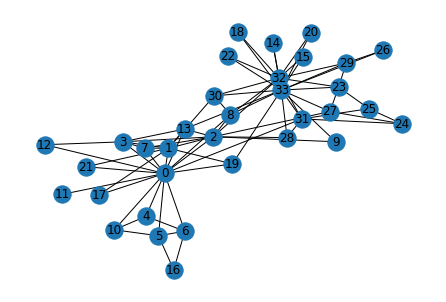

In [4]:
from networkx import spring_layout
pos = spring_layout(G, seed=60) 
nx.draw(G, with_labels=True,pos=pos)
plt.show()

The above is simple visualization of the graph. By using `seed=60` for the position, we are able to fix the layout of the network.

[NetworkX Gallery](https://networkx.org/documentation/stable/auto_examples/index.html) provides a number of example of visualization. It is recommended to check out the visualization to see which one is applicable for your use case. Then you can modify on top of it.

## Node Features

- Node degree
- Different node centrality measures
- Clustering coefficient
- Graphlet Degree Vector (There is no implementation in NetworkX for now)

In [5]:
def custom_print(feature_name,feature):
    print(f"\033[1;32m{feature_name}:\33[0m", feature,"\n")

### Node Degree

In [6]:
# ebunch is optional, by default is None.
# If nbunch is omitted, then return degrees of all nodes.
custom_print("Node Degree", nx.degree(G,nbunch=0))

Node Degree: 16 



### Node Centrality

The NetworkX documentation for centaility can bee find [here](https://networkx.org/documentation/stable/reference/algorithms/centrality.html)

In [7]:
custom_print("Node Degree Centraility",nx.degree_centrality(G))
custom_print("Node Eigenvector Centraility",nx.eigenvector_centrality(G))
custom_print("Node Betweenness Centraility",nx.betweenness_centrality(G))
custom_print("Node Closeness Centraility",nx.closeness_centrality(G))

Node Degree Centraility: {0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151} 

Node Eigenvector Centraility: {0: 0.3554834941851943, 1: 0.2659538704545025, 2: 0.3171893899684447, 3: 0.21117407832057059, 4: 0.0759

### Clustering Coefficient

The NetworkX documentation for clustering coefficient can be found [here](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)

In [8]:
custom_print("Node Clustering Coefficient",nx.clustering(G))

Node Clustering Coefficient: {0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882} 



## Link Features
The NetworkX documentation for link prediction can be found [here](
https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html)
- Distance-based Features
- Local Neighborhood Overlap 
- Global Neighborhood overlap: No implementation for Katz index in NetworkX

### Distance-based Features

In [9]:
# Source and target is optional, by default is None.
# If not specified, compute shortest paths for each possible node pairs.

custom_print("Shortest Path Length", nx.shortest_path_length(G,source=0, target=9))

Shortest Path Length: 2 



### Local Neighborhood Overlap 
- [Common Neighbors](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.common_neighbors.html)
- [Jaccard's Coefficient](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_prediction.jaccard_coefficient.html#networkx.algorithms.link_prediction.jaccard_coefficient)
- [Adamic-Adar Index](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_prediction.adamic_adar_index.html#networkx.algorithms.link_prediction.adamic_adar_index)

In [10]:
custom_print("Common Neighbors", 
             sorted(nx.common_neighbors(G, u=0, v=3)))

Common Neighbors: [1, 2, 7, 12, 13] 



In [11]:
# ebunch is optional, by default is None.
# If ebunch is None then all non-existent edges in the graph will be used.
custom_print("Jaccard's Coefficient", 
             sorted(nx.jaccard_coefficient(G, ebunch=[(0, 3)])))

Jaccard's Coefficient: [(0, 3, 0.29411764705882354)] 



In [12]:
# ebunch is optional, by default is None.
# If ebunch is None then all non-existent edges in the graph will be used.
custom_print("Adamic-Adar Index", 
             sorted(nx.adamic_adar_index(G, ebunch=[(0, 3)])))

Adamic-Adar Index: [(0, 3, 3.6747915911097273)] 



## Graph-Level Features
There is no implementation for graphlet count vector for Graphlet Kernel, and color count vectors for Weisfeiler-Lehman (WL) Kernel. 

[Weisfeiler Lehman subgraph hashes](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.graph_hashing.weisfeiler_lehman_subgraph_hashes.html#networkx.algorithms.graph_hashing.weisfeiler_lehman_subgraph_hashes) is implemented and can be used to derive color count vector.

## Reference
\[1\][Graph Types, NetworkX Offical Documention](https://networkx.org/documentation/stable/reference/classes/index.html)

\[2\][图机器学习NetworkX代码实战-上海地铁站点图数据挖掘](https://www.bilibili.com/video/BV1LY411R7HJ/?spm_id_from=333.788&vd_source=fccde7883fbf93ac15b03dee298f9f18)
